In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [ ]:
data = np.random.exponential(scale=2, size=1000)
df = pd.DataFrame({"Salary": data})

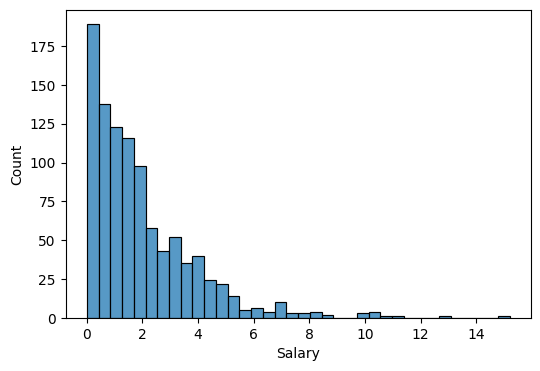

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df.Salary)
plt.show()

In [ ]:
df.Salary.skew()

np.float64(2.0117838372207664)

In [ ]:
df["updated_Salary"], lambda_val = boxcox(df.Salary)

In [ ]:
df.head()

,Salary,updated_Salary
0,0.373632,-0.855192
1,3.046731,1.317455
2,0.339814,-0.925308
3,0.289879,-1.038490
4,3.561385,1.538821


In [ ]:
lambda_val

np.float64(0.2930612044278577)

In [ ]:
df.updated_Salary.skew()

np.float64(-0.04710986486901489)

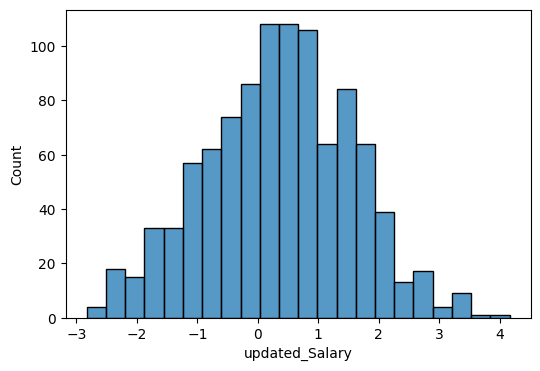

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df.updated_Salary)
plt.show()

In [ ]:
##left skrew##

In [ ]:
data = np.random.exponential(scale=2, size=1000)
data = 10 - data
df = pd.DataFrame({"Salary2":data})

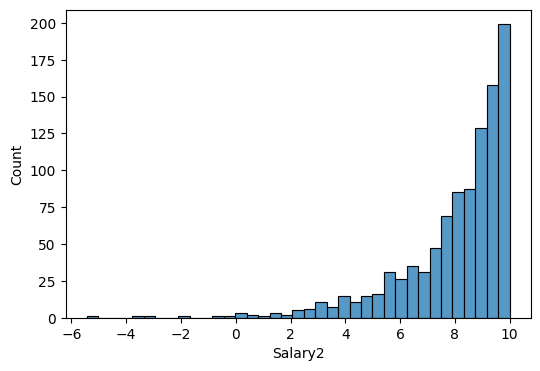

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df.Salary2)
plt.show()

In [ ]:
df.Salary2.skew()

np.float64(-1.9882263807923342)

In [ ]:
df["reflex_Salary"] =(df.Salary2.max()-df.Salary2) + 1

In [ ]:
df.head()

,Salary2,reflex_Salary
0,4.626919,6.365217
1,6.698677,4.293459
2,9.434940,1.557196
3,5.028648,5.963487
4,6.093568,4.898568


In [ ]:
max(df.reflex_Salary) , min(df.reflex_Salary)

(16.42636623567071, 1.0)

In [ ]:
df["transformed_Salary"] = np.log(df.reflex_Salary)

In [ ]:
df.transformed_Salary.skew()

np.float64(0.47425221763949243)

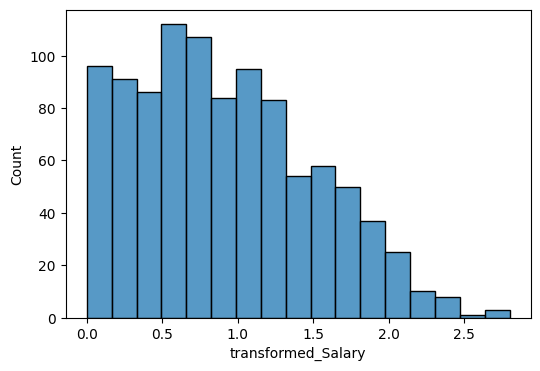

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df.transformed_Salary)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test2.csv to test2.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
data = pd.read_csv("test2.csv")
data

,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,NaN,IT,62000.0
4,4,Eve,29.0,HR,NaN
5,5,Alice,25.0,HR,50000.0


In [ ]:
data.shape

(6, 5)

In [ ]:
data.Salary = data.Salary.fillna(value=data.Salary.mean())
datam

,Unnamed: 0,Name,Age,Department,Salary,transformed_name
0,0,Alice,25.0,HR,50000.0,0
1,1,Bob,30.0,IT,60000.0,1
2,2,Charlie,35.0,Finance,70000.0,2
3,3,David,NaN,IT,62000.0,3
4,4,Eve,29.0,HR,58400.0,4
5,5,Alice,25.0,HR,50000.0,0


In [ ]:
encoder = LabelEncoder()

In [ ]:
data["transformed_name"] = encoder.fit_transform(data.Name)

In [ ]:
encoder2 = OneHotEncoder(sparse_output=False)

In [ ]:
encoder = encoder2.fit_transform(data[["Department"]])

In [ ]:
encoder2.get_feature_names_out()

array(['Department_Finance', 'Department_HR', 'Department_IT'],
      dtype=object)

In [ ]:
encoder

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [ ]:
scalar = StandardScaler()


In [ ]:
data["scalar_Salary"] = scalar.fit_transform(data[["Salary"]])

In [ ]:
data.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name,scalar_Salary
0,0,Alice,25.0,HR,50000.0,0,-1.205755
1,1,Bob,30.0,IT,60000.0,1,0.229668
2,2,Charlie,35.0,Finance,70000.0,2,1.665091
3,3,David,NaN,IT,62000.0,3,0.516752
4,4,Eve,29.0,HR,58400.0,4,0.000000


In [ ]:
minmax_scale = MinMaxScaler()
data["Minmax_scalar"] = minmax_scale.fit_transform(data[["Salary"]])

In [ ]:
data.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name,scalar_Salary,Minmax_scalar
0,0,Alice,25.0,HR,50000.0,0,-1.205755,0.00
1,1,Bob,30.0,IT,60000.0,1,0.229668,0.50
2,2,Charlie,35.0,Finance,70000.0,2,1.665091,1.00
3,3,David,NaN,IT,62000.0,3,0.516752,0.60
4,4,Eve,29.0,HR,58400.0,4,0.000000,0.42


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_visualization.csv to data_visualization.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
data = pd.read_csv("data_visualization.csv")
data

,Unnamed: 0,Student_ID,Name,Gender,Department,Age,Math_Score,Science_Score,Attendance_Percentage,Study_Hours_per_Week
0,0,1,Aarav,Male,CS,21,78,75,85,10
1,1,2,Diya,Female,IT,22,85,88,90,12
2,2,3,Rohan,Male,CS,20,90,85,95,15
3,3,4,Sneha,Female,ECE,21,67,70,80,8
4,4,5,Arjun,Male,IT,23,88,90,92,14
5,5,6,Meera,Female,ECE,22,76,79,88,9
6,6,7,Kiran,Male,CS,21,92,94,96,16
7,7,8,Ananya,Female,IT,20,81,83,89,11
8,8,9,Rahul,Male,ECE,22,74,72,75,7
9,9,10,Isha,Female,CS,23,89,91,93,15


In [ ]:
data.head()

,Unnamed: 0,Student_ID,Name,Gender,Department,Age,Math_Score,Science_Score,Attendance_Percentage,Study_Hours_per_Week
0,0,1,Aarav,Male,CS,21,78,75,85,10
1,1,2,Diya,Female,IT,22,85,88,90,12
2,2,3,Rohan,Male,CS,20,90,85,95,15
3,3,4,Sneha,Female,ECE,21,67,70,80,8
4,4,5,Arjun,Male,IT,23,88,90,92,14


<Figure size 640x480 with 0 Axes>

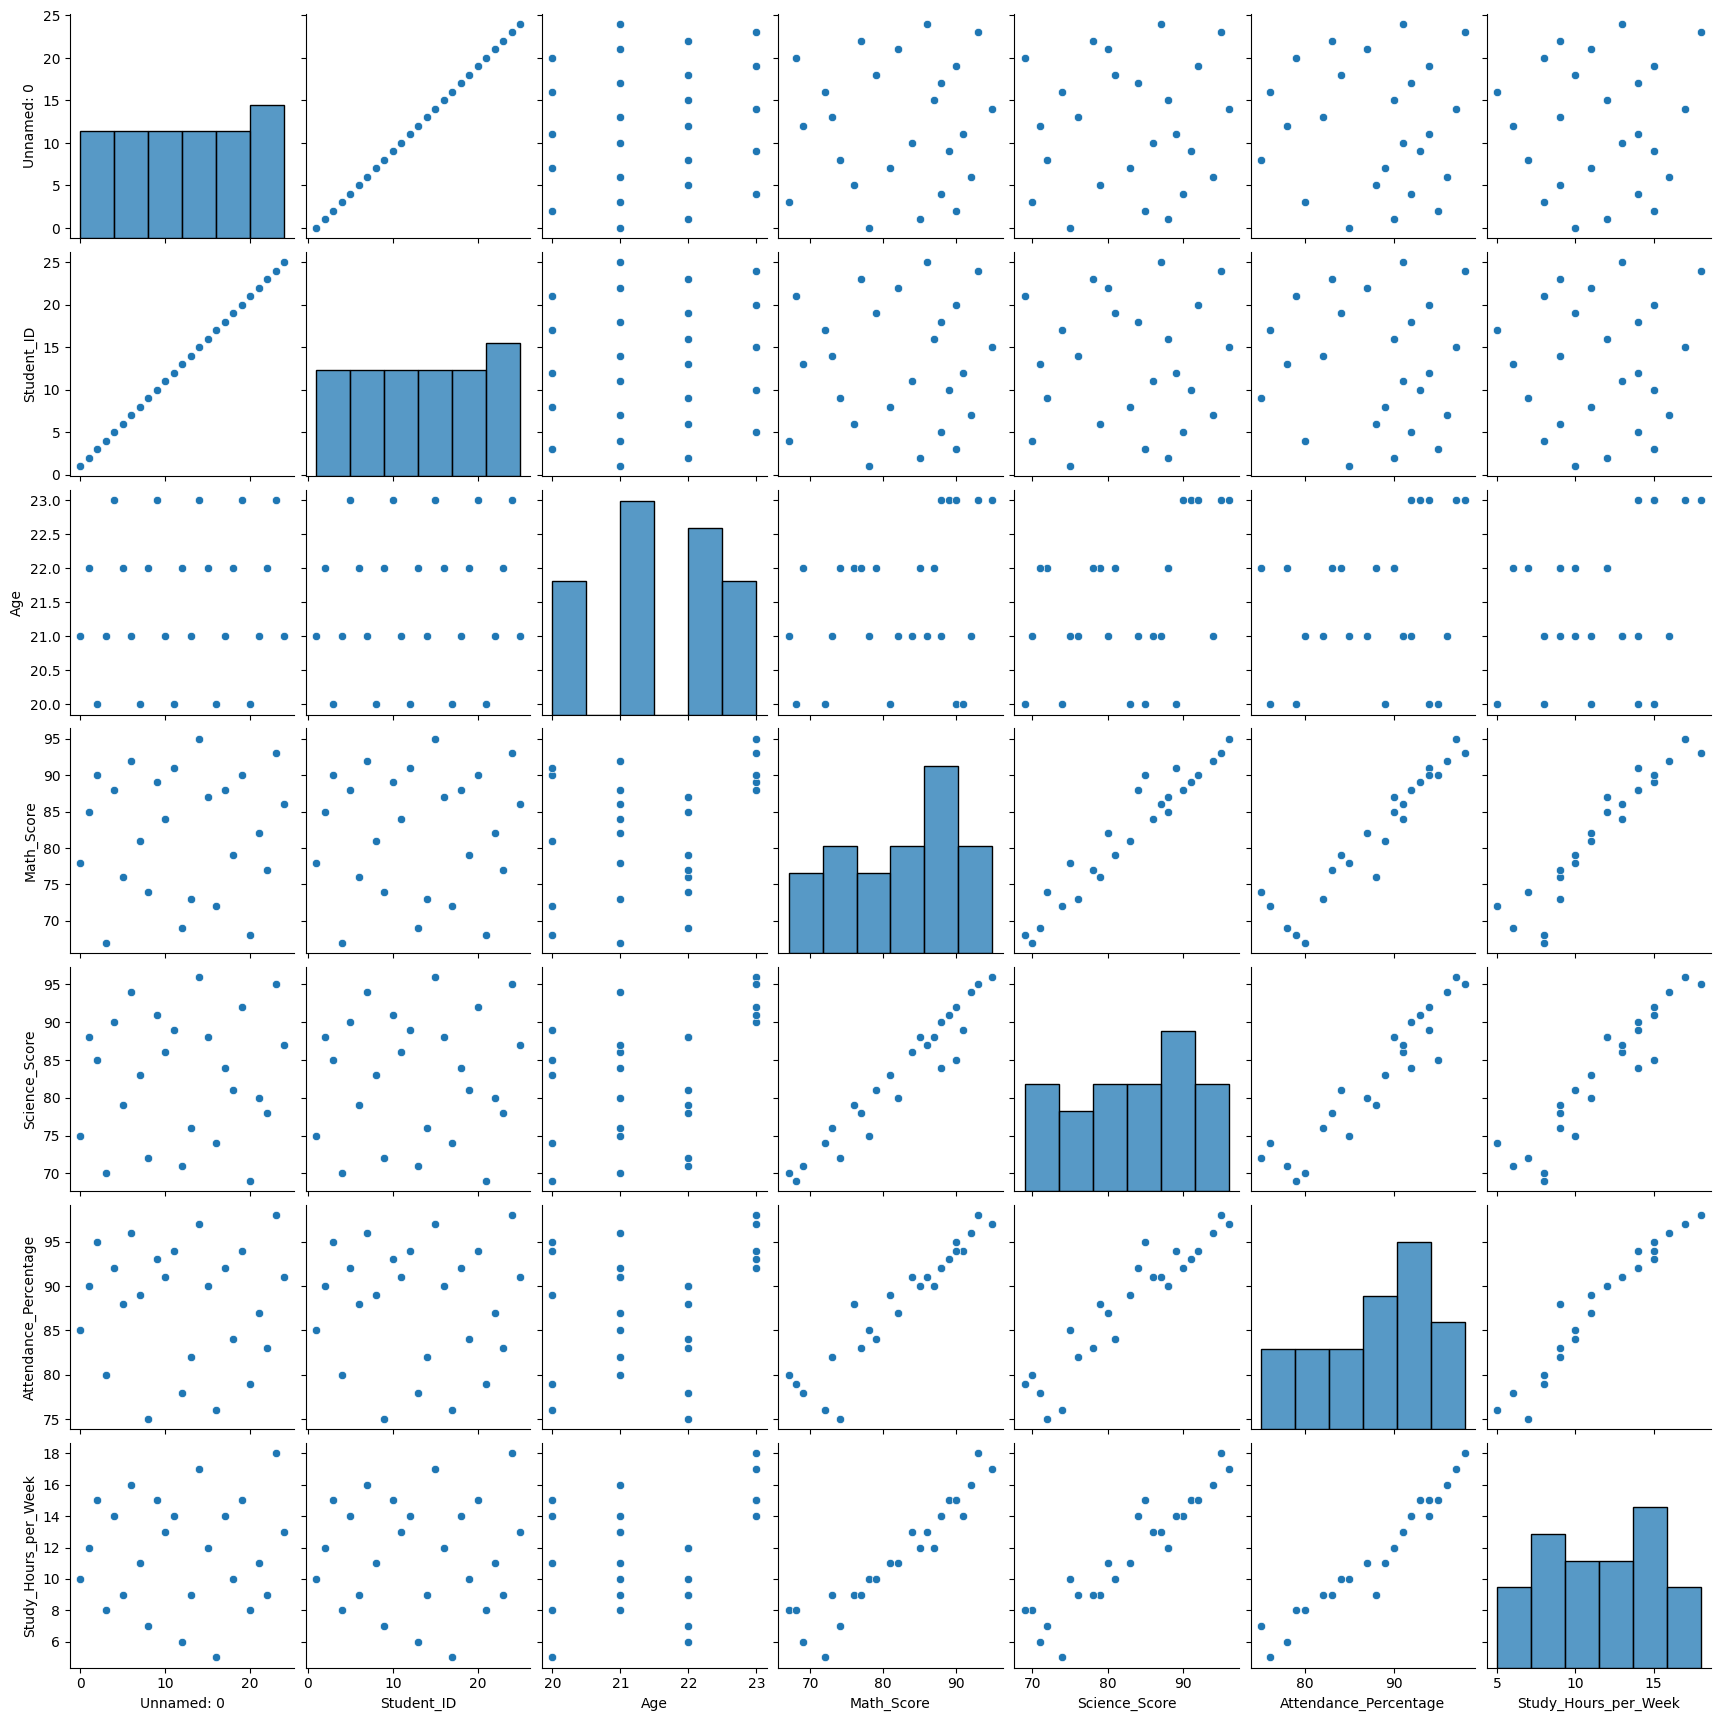

In [ ]:
plt.figure()
sns.pairplot(data)

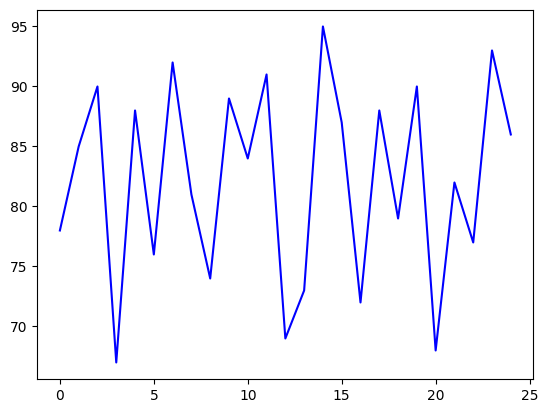

In [ ]:
plt.plot(data.Math_Score,color= "blue")

<function matplotlib.pyplot.show(close=None, block=None)>

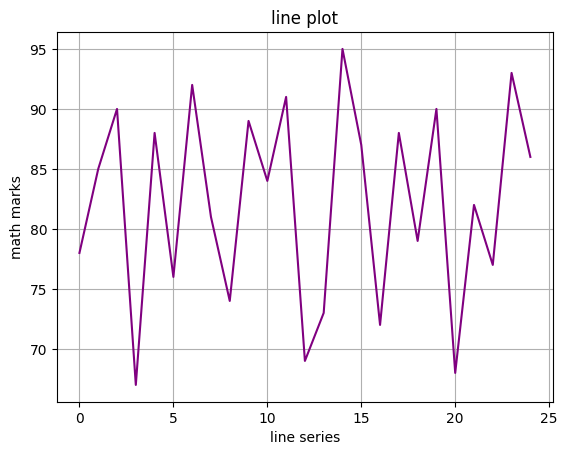

In [ ]:
plt.plot(data.Math_Score,color= "purple")
plt.grid()
plt.title("line plot")
plt.xlabel("line series")
plt.ylabel("math marks")
plt.show

Please upload 'data_visualization.csv' when prompted:


Saving data_visualization.csv to data_visualization (2).csv


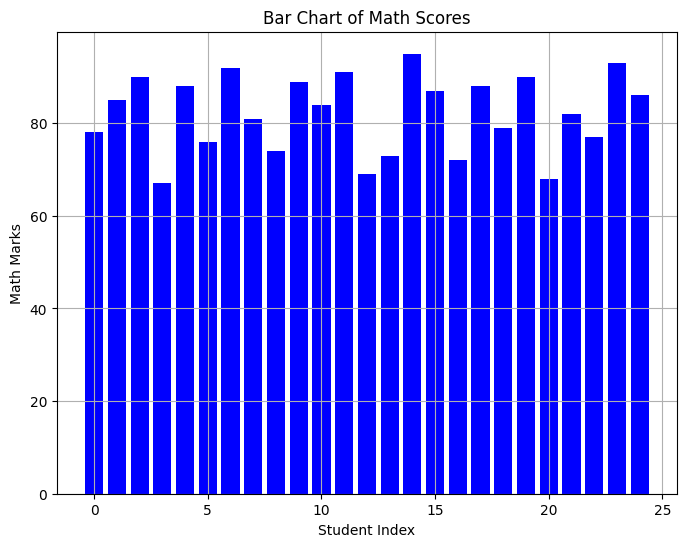

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

print("Please upload 'data_visualization.csv' when prompted:")
uploaded = files.upload()

data = pd.read_csv("data_visualization.csv")
plt.figure(figsize=(8, 6))
plt.bar(data.index, data.Math_Score, color="blue")
plt.grid(True)
plt.title("Bar Chart of Math Scores")
plt.xlabel("Student Index")
plt.ylabel("Math Marks")
plt.show()

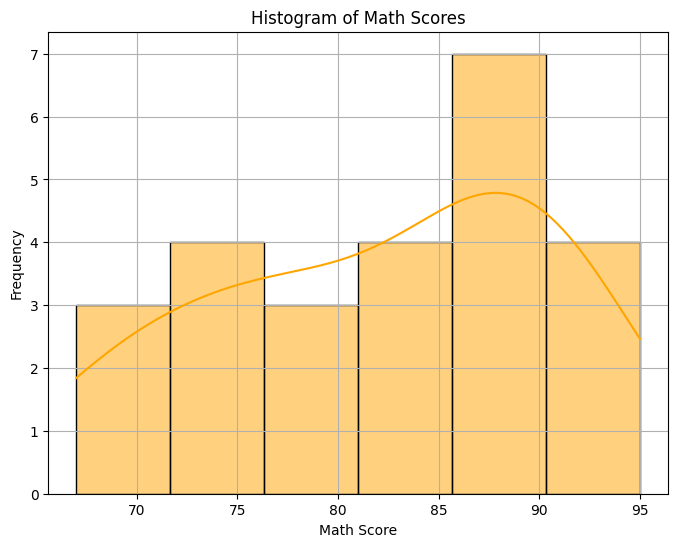

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(data.Math_Score, kde=True, color='orange')
plt.grid(True)
plt.title("Histogram of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.show()

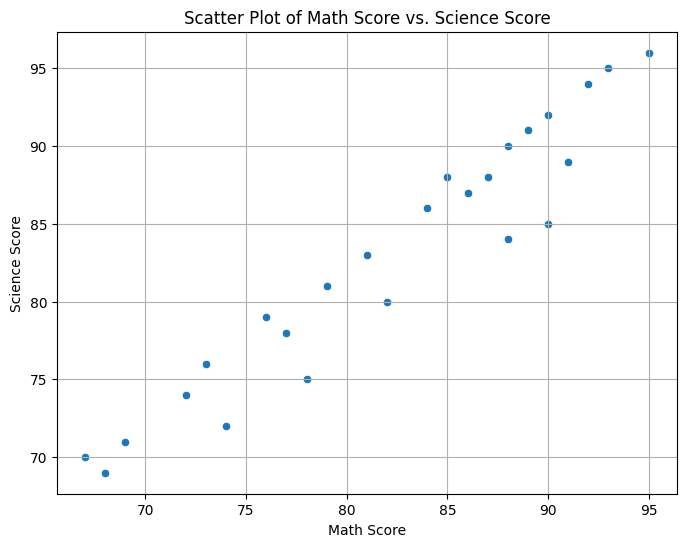

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Math_Score', y='Science_Score', data=data)
plt.grid(True)
plt.title("Scatter Plot of Math Score vs. Science Score")
plt.xlabel("Math Score")
plt.ylabel("Science Score")
plt.show()

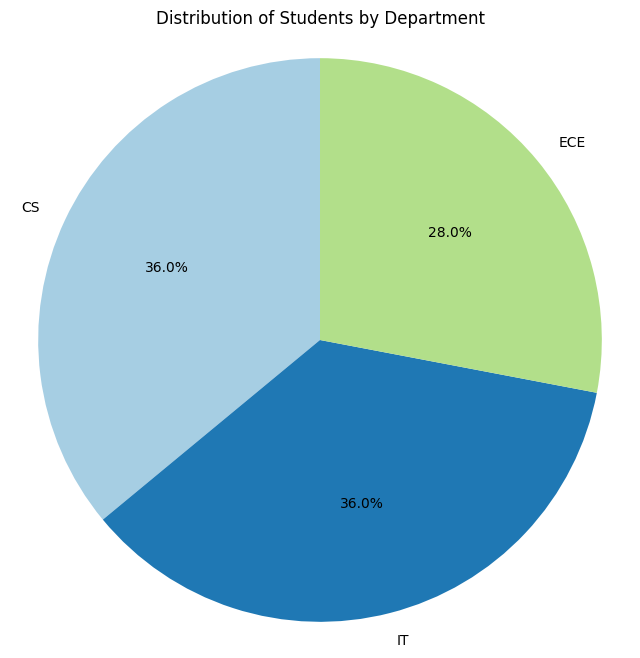

In [ ]:
import matplotlib.pyplot as plt

department_counts = data['Department'].value_counts()
labels = department_counts.index
sizes = department_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Students by Department')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

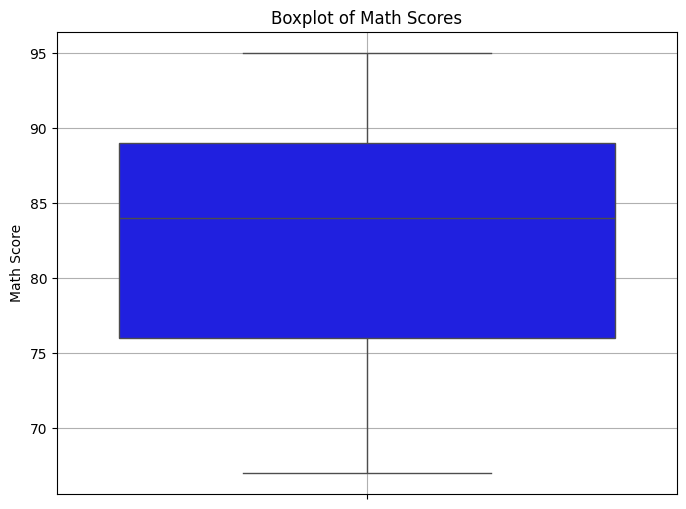

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Math_Score'], color='blue')
plt.title('Boxplot of Math Scores')
plt.ylabel('Math Score')
plt.grid(True)
plt.show()

In [ ]:
#day11| task1



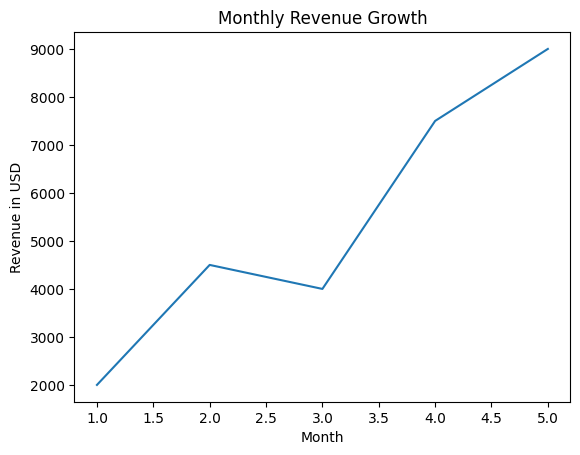

In [ ]:
import matplotlib.pyplot as plt

months = [1, 2, 3, 4, 5]
revenue = [2000, 4500, 4000, 7500, 9000]

plt.plot(months, revenue)

plt.title("Monthly Revenue Growth")
plt.xlabel("Month")
plt.ylabel("Revenue in USD")


plt.show()